In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder
from sklearn.decomposition import PCA

from sklearn import metrics

In [2]:
def k_means_metric(data, true_labels, k_means_labels):
    print()
    print("k-means Metric:")
    print("Homogeneity: ", metrics.homogeneity_score(true_labels, k_means_labels))
    print("Completeness: ", metrics.completeness_score(true_labels, k_means_labels))
    print("V-Measure: ", metrics.v_measure_score(true_labels, k_means_labels))
    print("Silhouette Score: ", metrics.silhouette_score(data, k_means_labels, metric='euclidean'))
    print()

In [3]:
def visualize_k_means(data, k_means):
    plt.figure()
    k = len(k_means.cluster_centers_)
    for i in range(k):
        colors = ['r', 'g', 'b', 'y', 'c', 'm']
        points_in_cluster = np.array([data[j] for j in range(len(data)) if k_means.labels_[j] == i])
        plt.scatter(points_in_cluster[:, 0], points_in_cluster[:, 1], \
                    marker='.', color=colors[i % len(colors)])
    plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 1], marker='*', color='k')
    plt.title('k-Means Clustering with k={} clusters'.format(k))
    plt.show()

#### Erster Versuch mit k-means ohne Feature Engineering

In diesem Versuch wurde zuerst die Anzahl Clusters mittel k-means evaluiert. Dies geschiet durch die Auswertung der Error Rate. Danach wurde ein Clustering mit der optimalen Anzahl gemacht. Das Resultat war sehr schlecht. Es wurde bewusst nur die ertsen 150 Datensätze verwendet, da der Rest über Missing Values verfügt. Es wurde noch kein test-train split vorgenommen.

In [4]:
# Laden der Daten
csv = pd.read_csv("../Data/Biral_Products_csv.csv", delimiter=",", header=0)
csv.drop(columns=["Bezeichnung", "Beschreibung", "Anwendungsgebiet"], inplace=True)
data = np.array(csv)

# Gruppenbezeichnung one-hot eoncoden
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data[:,0])
print(integer_encoded.shape)

csv = csv.assign(category_one_hot = integer_encoded)
labels = csv.category_one_hot

# Gruppenbezeichnung nach dem one-hot encoding entfernen.
csv.drop(columns="Gruppenbezeichnung", inplace=True)
data = np.array(csv)

print(data.shape)

(222,)
(222, 16)


In [5]:
# Missing Values mit dem Most Frequent Value ersetzen.
imputer_scaler = Imputer(missing_values="NaN", strategy="most_frequent", verbose=1)
data = imputer_scaler.fit_transform(data)
print(data.shape)

(222, 16)


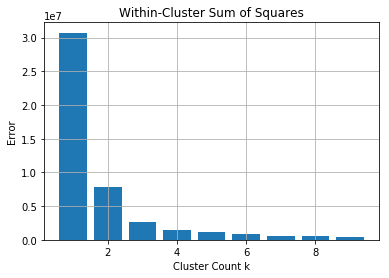

In [6]:
# Beste Anzahl an Cluster evaluieren.
Ks = range(1, 10)
inertia = []
for k in Ks:
    k_means = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(k_means.inertia_)
plt.bar(Ks, inertia)
plt.title('Within-Cluster Sum of Squares')
plt.xlabel('Cluster Count k')
plt.ylabel('Error')
plt.grid()
plt.show()

#### Erster Versuch mit k-mean un der optimalen Anzahl an Clustern

In [7]:
# k-means mit der optimalen Anzahl von 3 Clustern ausführen.
k = 3
k_means = KMeans(n_clusters=k, random_state=0).fit(data)
k_means_metric(data, labels, k_means.labels_)


k-means Metric:
Homogeneity:  0.054128243145565816
Completeness:  0.0757875822225958
V-Measure:  0.06315240912851194
Silhouette Score:  0.7215507238177798



#### Zweiter Versuch mit k-means und den verschiedenen Scaler

In [8]:
k = 3
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]
for s in scalers:
    s.fit(data)
    data_scaled = s.transform(data)
    k_means = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    print(type(s))
    k_means_metric(data_scaled, labels, k_means.labels_)

<class 'sklearn.preprocessing.data.StandardScaler'>

k-means Metric:
Homogeneity:  0.5928636499174268
Completeness:  0.5507789597400168
V-Measure:  0.5710469715132382
Silhouette Score:  0.3481758547073592

<class 'sklearn.preprocessing.data.MinMaxScaler'>

k-means Metric:
Homogeneity:  0.5907118197614116
Completeness:  0.5458045563032544
V-Measure:  0.5673709758663793
Silhouette Score:  0.3979896500721858

<class 'sklearn.preprocessing.data.RobustScaler'>

k-means Metric:
Homogeneity:  0.11137462702697265
Completeness:  0.13565139397482037
V-Measure:  0.12232009687372071
Silhouette Score:  0.5245067818282858

<class 'sklearn.preprocessing.data.Normalizer'>

k-means Metric:
Homogeneity:  0.060859926057923085
Completeness:  0.0563225029620278
V-Measure:  0.0585033676863375
Silhouette Score:  0.5281679171198188



#### Versuch mit PCA, um die dimension des Datasets zu redzuieren
Die Vorgängigen versuche besser Resultate zu erziehlen, sind nicht erfolgreich gewesen.

Original Shape: (222, 16)
Reduced Shape: (222, 2)

k-means Metric:
Homogeneity:  0.054128243145565816
Completeness:  0.0757875822225958
V-Measure:  0.06315240912851194
Silhouette Score:  0.7408511770937148



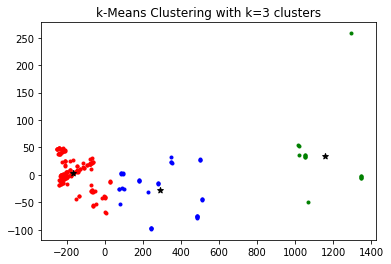

In [11]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
print("Original Shape: {}".format(str(data.shape)))
print("Reduced Shape: {}".format(str(data_pca.shape)))

k_means = KMeans(n_clusters=k, random_state=0).fit(data_pca)
k_means_metric(data_pca, labels, k_means.labels_)
visualize_k_means(data_pca, k_means)